In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [9]:
data_std = pickle.load(open('./results/1603676581.2557468_full_100_trials.pickle', 'rb'))

In [10]:
names = data_std['names']
data_std = data_std['results']

In [11]:
names

['q_mutual',
 'adp_sharing_tuples',
 'q_standard',
 'adp_standard',
 'single_agent_mutual']

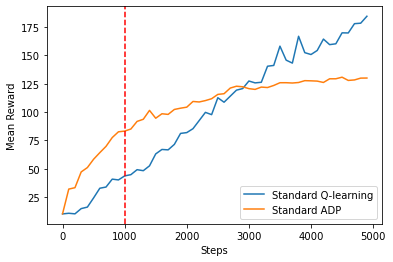

In [14]:
xticks = np.arange(50) * 100
std_q_mean = np.mean(data_std, axis=0).T[2]
std_adp_mean = np.mean(data_std, axis=0).T[3]
plt.plot(xticks, std_q_mean, label='Standard Q-learning')
plt.plot(xticks, std_adp_mean, label='Standard ADP')
plt.axvline(1000, color='r', ls='--')

plt.xlabel('Steps')
plt.ylabel('Mean Reward')

plt.legend()

plt.savefig('./figs/standards.png')

In [15]:
data_mut = pickle.load(open('./results/1607601814.6805024_test.pickle', 'rb'))
data_mut['names']

['q_mutual', 'adp_sharing_tuples', 'single_agent_mutual']

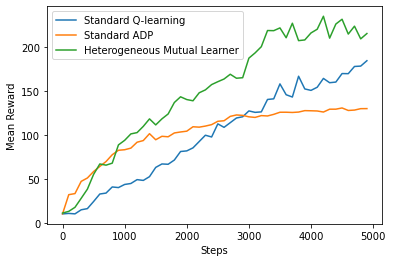

In [16]:
xticks = np.arange(50) * 100

mut_q_mean = np.mean(data_mut['results'], axis=0)[:, 0]
mut_adp_mean = np.mean(data_mut['results'], axis=0)[:, 1]
hetmut_mean = np.mean(data_mut['results'], axis=0)[:, 2]

plt.plot(xticks, std_q_mean, label='Standard Q-learning')
plt.plot(xticks, std_adp_mean, label='Standard ADP')
plt.plot(xticks, hetmut_mean, label='Heterogeneous Mutual Learner')

plt.xlabel('Steps')
plt.ylabel('Mean Reward')

plt.legend()

plt.savefig('./figs/het_comparison.png')

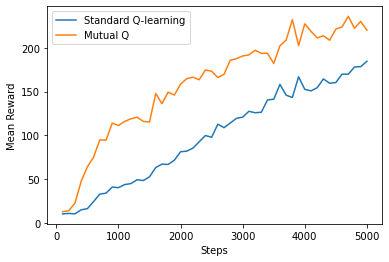

In [19]:
xticks = np.arange(1, 51) * 100

q_std = np.std(data, axis=0).T[2]
q_mean = np.mean(data, axis=0).T[2]
plt.plot(xticks, q_mean, label='Standard Q-learning')

plt.plot(xticks, mut_q_mean, label='Mutual Q')

plt.xlabel('Steps')
plt.ylabel('Mean Reward')

plt.legend()

plt.savefig('./figs/q_mutual_comparison.png')

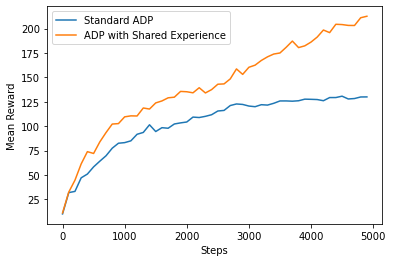

In [21]:
xticks = np.arange(50) * 100

adp_std = np.std(data, axis=0).T[3]
adp_mean = np.mean(data, axis=0).T[3]
plt.plot(xticks, adp_mean, label='Standard ADP')

share_std  = np.std(data, axis=0).T[1]
share_mean = np.mean(data, axis=0).T[1]
plt.plot(xticks, mut_adp_mean, label='ADP with Shared Experience')

plt.xlabel('Steps')
plt.ylabel('Mean Reward')

plt.legend()

plt.savefig('./figs/adp_mutual_comparison.png')